In [5]:
import os
import shutil
from PIL import Image 
from tensorflow import keras
import numpy as np


def ziffer_data_files(input_dir):
    imgfiles = []
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if (file.endswith(".jpg") and not file.startswith("10_") and not file.startswith("N")):
                #print(root + "/" + file)
                imgfiles.append(root + "/" + file)
    return  imgfiles

def ziffer_data(input_dir='images'):
    
    files = ziffer_data_files(input_dir)
    
    y_data = np.empty((len(files)))
    y_file = np.empty((len(files)), dtype="<U250")
    x_data = np.empty((len(files),32,20,3))

    for i, aktfile in enumerate(files):
        base = os.path.basename(aktfile)

        # get label from filename (1.2_ new or 1_ old),
        if (base[1]=="."):
            target = base[0:3]
        else:
            target = base[0:1]
         
        category = float(target)
        
        test_image = Image.open(aktfile).resize((20, 32))
        test_image = np.array(test_image, dtype="float32")
        y_file[i] =  str(base)
        x_data[i] = test_image
        y_data[i] =  category
    print("meter digit count: ", len(y_data))   
    return x_data, y_data.reshape(-1), y_file.reshape(-1)
x_md, y_md, f_md = ziffer_data('../images')

print(f_md.dtype)

meter digit count:  12462
<U250


In [7]:
import os
from PIL import Image

output_dir = '../datasets/meterdigits'

for x, y, f in zip(x_md, y_md, f_md):
    image = Image.fromarray(x.astype(np.uint8), mode='RGB')
    os.makedirs(os.path.join(output_dir, str(y)), exist_ok=True)
    image.save(os.path.join(output_dir, str(y), str(f) + '.jpg'))

In [8]:
import tensorflow as tf
ds = tf.keras.utils.image_dataset_from_directory(directory=output_dir, 
                                            image_size=(32,28), 
                                            batch_size=32,
                                            color_mode='rgb',
                                            label_mode='categorical',
                                            shuffle=True)

Found 12301 files belonging to 100 classes.
Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-06-21 00:30:51.912471: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-21 00:30:51.912642: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2022-06-21 00:30:55.743625: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


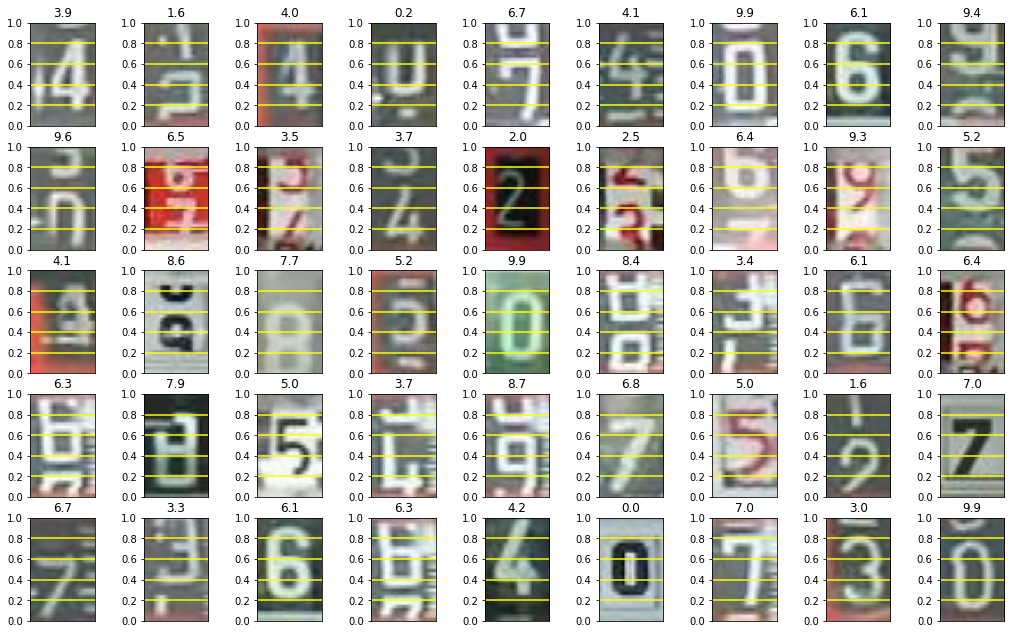

In [9]:
import matplotlib.pyplot as plt

def plot_dataset_it(data_iter, columns=9, rows=5):

    fig = plt.figure(figsize=(18, 11))
    
    for i in range(1, columns*rows +1):
        img, label = data_iter.next()
        fig.add_subplot(rows, columns, i)
        plt.xticks([0.2, 0.4, 0.6, 0.8])
        plt.title(np.argmax(label)/10)  # set title
        plt.imshow(np.array(img[0]).astype(np.uint8), aspect='1.6', extent=[0, 1, 0, 1])
        ax=plt.gca()
        ax.get_xaxis().set_visible(False) 
        # yellow lines
        for y in np.arange(0.2, 0.8, 0.2):
                plt.axhline(y=y,color='yellow')
    plt.show()

plot_dataset_it(iter(ds))